were downloaded necessary libraries


In [ ]:
!pip install prince
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 37.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=ce1aa64d068928ea1b478ae83ec8688608a9f09bb1c09f6aeb61d78a0a7bb075
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7a990f4981be8d58dba6bf2d4e2e6d85b4b5db6e81a79a248a0790f190b00910
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince # for multiple correspondence analysis
import pingouin as pg # for Cronbach’s Alpha
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv('Aircraft_Wildlife_Strikes.csv')
print(data.columns)

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def missing_values_table(data):
        mis_val = data.isnull().sum()

        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [ ]:
missingness= missing_values_table(data)
missingness

Your selected dataframe has 66 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values
Injuries,173875,99.9
Fatalities,173539,99.7
Engine4 Position,171012,98.2
Engine3 Position,162445,93.3
Speed,102846,59.1
Warning Issued,97686,56.1
Precipitation,85782,49.3
Flight Impact,74639,42.9
Distance,74391,42.7
Height,70427,40.5


# Here threshold is 30% which means we are going to drop columns having more than 30% of missing values

In [ ]:
def rmissingvaluecol(data, threshold):
    l = []
    l = list(data.drop(data.loc[:,list((100*(data.isnull().sum()/len(data.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (data.shape[1] - len(l)))
    print("Columns:\n", list(set(list((data.columns.values))) - set(l)))
    return l
 # Here threshold is 30% which means we are going to drop columns having more than 30% of missing values
rmissingvaluecol(data,30)

# Columns having more than 30 percent missing values:  13
Columns:
 ['Flight Phase', 'Fatalities', 'Distance', 'Height', 'Engine3 Position', 'Injuries', 'Engine4 Position', 'Flight Impact', 'Engine2 Position', 'Precipitation', 'Speed', 'Warning Issued', 'Visibility']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


['Record ID',
 'Incident Year',
 'Incident Month',
 'Incident Day',
 'Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Mass',
 'Engine Make',
 'Engine Model',
 'Engines',
 'Engine Type',
 'Engine1 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Aircraft Damage',
 'Radome Strike',
 'Radome Damage',
 'Windshield Strike',
 'Windshield Damage',
 'Nose Strike',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Strike',
 'Wing or Rotor Damage',
 'Fuselage Strike',
 'Fuselage Damage',
 'Landing Gear Strike',
 'Landing Gear Damage',
 'Tail Strike',
 'Tail Damage',
 'Lights Strike',
 'Lights Damage',
 'Other Strike',
 'Other Damage']

In [ ]:
data = data[rmissingvaluecol(data,30)]

# Columns having more than 30 percent missing values:  13
Columns:
 ['Flight Phase', 'Fatalities', 'Distance', 'Height', 'Engine3 Position', 'Injuries', 'Engine4 Position', 'Flight Impact', 'Engine2 Position', 'Precipitation', 'Speed', 'Warning Issued', 'Visibility']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


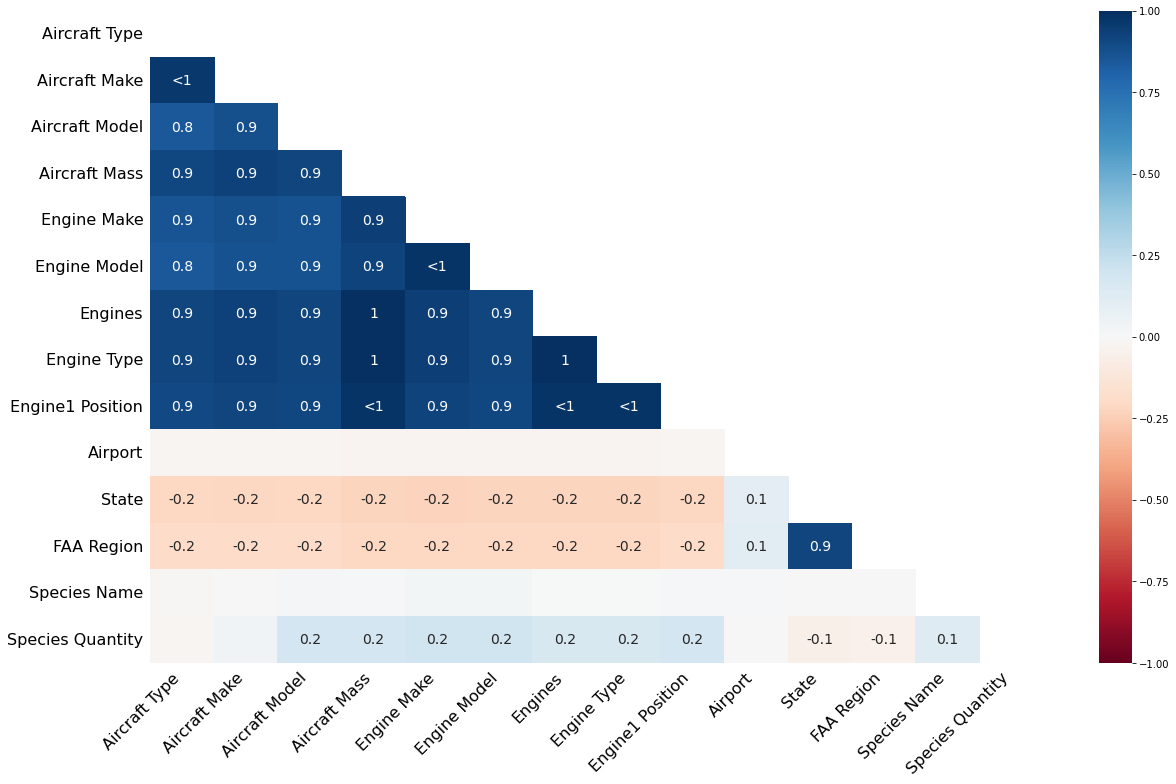

In [ ]:
msno.heatmap(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [ ]:
cor_matrix = data.corr().abs()
cor_matrix

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Aircraft Damage,Radome Strike,Radome Damage,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
Record ID,1.000000,0.859320,0.004835,0.004243,0.044724,0.230940,0.129891,0.109981,0.014263,0.027869,...,0.013111,0.014089,0.022432,0.026584,0.009129,0.015444,0.012245,0.012845,0.106018,0.030642
Incident Year,0.859320,1.000000,0.031945,0.003285,0.047271,0.229563,0.091497,0.138950,0.003829,0.038450,...,0.017081,0.020774,0.019018,0.036759,0.013424,0.024572,0.015765,0.021266,0.107612,0.049188
Incident Month,0.004835,0.031945,1.000000,0.045127,0.001242,0.006968,0.001657,0.014571,0.011400,0.001281,...,0.003569,0.002172,0.004896,0.001086,0.003006,0.000892,0.003433,0.004992,0.008582,0.004121
Incident Day,0.004243,0.003285,0.045127,1.000000,0.002145,0.000003,0.003668,0.003325,0.002742,0.002589,...,0.002505,0.002110,0.000434,0.000857,0.000798,0.000609,0.001837,0.001312,0.004439,0.000295
Aircraft Mass,0.044724,0.047271,0.001242,0.002145,1.000000,0.184513,0.515278,0.201807,0.149102,0.010792,...,0.071265,0.066250,0.080101,0.107004,0.099322,0.075724,0.026334,0.029291,0.047194,0.110565
Engine Make,0.230940,0.229563,0.006968,0.000003,0.184513,1.000000,0.229766,0.028385,0.024241,0.024587,...,0.018961,0.011907,0.023748,0.025955,0.038407,0.034207,0.000160,0.004980,0.045633,0.021239
Engines,0.129891,0.091497,0.001657,0.003668,0.515278,0.229766,1.000000,0.085495,0.062518,0.011743,...,0.040665,0.032652,0.044401,0.050254,0.054156,0.044304,0.011871,0.012163,0.046070,0.059369
Aircraft Damage,0.109981,0.138950,0.014571,0.003325,0.201807,0.028385,0.085495,1.000000,0.020483,0.313318,...,0.012646,0.224841,0.069835,0.249309,0.135657,0.211134,0.176924,0.212152,0.017613,0.310527
Radome Strike,0.014263,0.003829,0.011400,0.002742,0.149102,0.024241,0.062518,0.020483,1.000000,0.273985,...,0.053685,0.002485,0.026686,0.013414,0.006990,0.010726,0.004055,0.008604,0.088170,0.006210
Radome Damage,0.027869,0.038450,0.001281,0.002589,0.010792,0.024587,0.011743,0.313318,0.273985,1.000000,...,0.004889,0.068083,0.000671,0.031535,0.020091,0.025583,0.012931,0.017954,0.010402,0.043257


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Aircraft Damage,Radome Strike,Radome Damage,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
Record ID,NaN,0.85932,0.004835,0.004243,0.044724,0.230940,0.129891,0.109981,0.014263,0.027869,...,0.013111,0.014089,0.022432,0.026584,0.009129,0.015444,0.012245,0.012845,0.106018,0.030642
Incident Year,NaN,NaN,0.031945,0.003285,0.047271,0.229563,0.091497,0.138950,0.003829,0.038450,...,0.017081,0.020774,0.019018,0.036759,0.013424,0.024572,0.015765,0.021266,0.107612,0.049188
Incident Month,NaN,NaN,NaN,0.045127,0.001242,0.006968,0.001657,0.014571,0.011400,0.001281,...,0.003569,0.002172,0.004896,0.001086,0.003006,0.000892,0.003433,0.004992,0.008582,0.004121
Incident Day,NaN,NaN,NaN,NaN,0.002145,0.000003,0.003668,0.003325,0.002742,0.002589,...,0.002505,0.002110,0.000434,0.000857,0.000798,0.000609,0.001837,0.001312,0.004439,0.000295
Aircraft Mass,NaN,NaN,NaN,NaN,NaN,0.184513,0.515278,0.201807,0.149102,0.010792,...,0.071265,0.066250,0.080101,0.107004,0.099322,0.075724,0.026334,0.029291,0.047194,0.110565
Engine Make,NaN,NaN,NaN,NaN,NaN,NaN,0.229766,0.028385,0.024241,0.024587,...,0.018961,0.011907,0.023748,0.025955,0.038407,0.034207,0.000160,0.004980,0.045633,0.021239
Engines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085495,0.062518,0.011743,...,0.040665,0.032652,0.044401,0.050254,0.054156,0.044304,0.011871,0.012163,0.046070,0.059369
Aircraft Damage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020483,0.313318,...,0.012646,0.224841,0.069835,0.249309,0.135657,0.211134,0.176924,0.212152,0.017613,0.310527
Radome Strike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.273985,...,0.053685,0.002485,0.026686,0.013414,0.006990,0.010726,0.004055,0.008604,0.088170,0.006210
Radome Damage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004889,0.068083,0.000671,0.031535,0.020091,0.025583,0.012931,0.017954,0.010402,0.043257


In [ ]:
highly_correlated_vars = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(highly_correlated_vars)

['Incident Year', 'Lights Damage']


In [ ]:
#df1 = data.drop(data[highly_correlated], axis=1)
#print(df1.head())

In [ ]:
data.nunique()

Record ID               174104
Incident Year               26
Incident Month              12
Incident Day                31
Operator ID                539
Operator                   533
Aircraft                   656
Aircraft Type                3
Aircraft Make               95
Aircraft Model             120
Aircraft Mass                5
Engine Make                 34
Engine Model                96
Engines                      4
Engine Type                  9
Engine1 Position            15
Airport ID                2228
Airport                   2226
State                       62
FAA Region                  15
Species ID                 719
Species Name               715
Species Quantity             4
Aircraft Damage              2
Radome Strike                2
Radome Damage                2
Windshield Strike            2
Windshield Damage            2
Nose Strike                  2
Nose Damage                  2
Engine1 Strike               2
Engine1 Damage               2
Engine2 

In [ ]:
list_lt15 = []
for i in data.columns:
    if data[i].nunique()<15:
        list_lt15.append(i)
correspondence_data = data[list_lt15].astype("category")
correspondence_data.dtypes

Incident Month          category
Aircraft Type           category
Aircraft Mass           category
Engines                 category
Engine Type             category
Species Quantity        category
Aircraft Damage         category
Radome Strike           category
Radome Damage           category
Windshield Strike       category
Windshield Damage       category
Nose Strike             category
Nose Damage             category
Engine1 Strike          category
Engine1 Damage          category
Engine2 Strike          category
Engine2 Damage          category
Engine3 Strike          category
Engine3 Damage          category
Engine4 Strike          category
Engine4 Damage          category
Engine Ingested         category
Propeller Strike        category
Propeller Damage        category
Wing or Rotor Strike    category
Wing or Rotor Damage    category
Fuselage Strike         category
Fuselage Damage         category
Landing Gear Strike     category
Landing Gear Damage     category
Tail Strik

# **Multiple Correspondence Analysis**

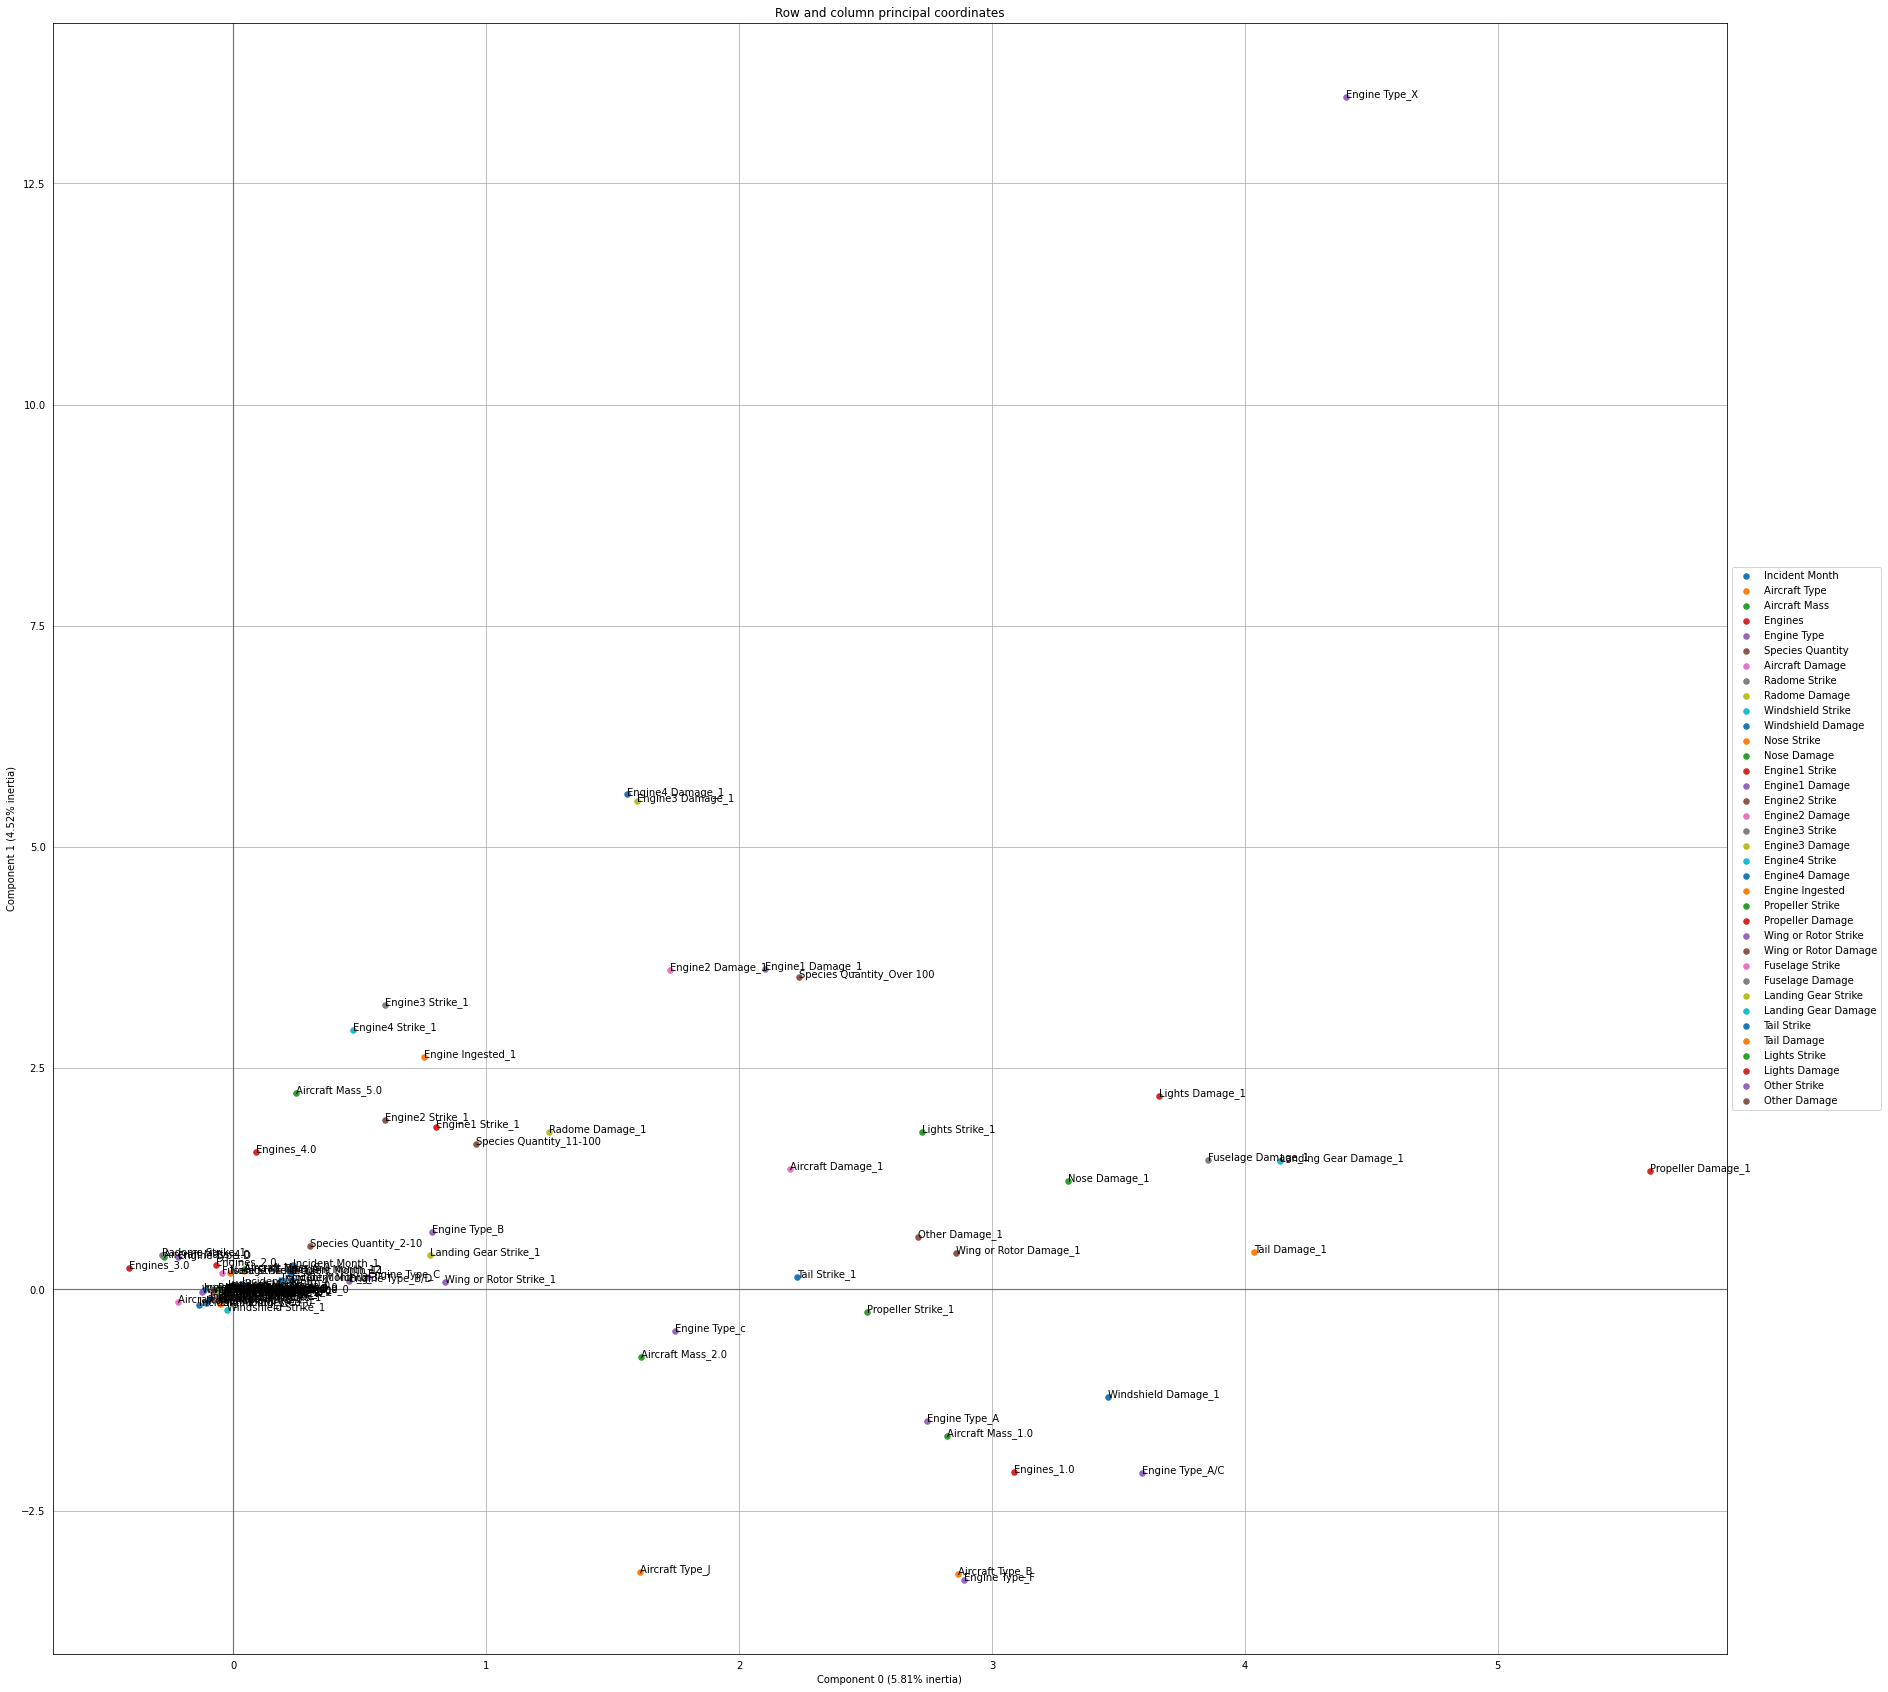

In [ ]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
data_mca = mca.fit(correspondence_data)

ax = data_mca.plot_coordinates(
        X=correspondence_data,
        ax=None,
        figsize=(30, 30),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Contingency Table 

showing correlation between 'Aircraft Type' and 'Engines'.

In [ ]:
data_crosstab = pd.crosstab(data['Aircraft Type'],
							data['Engines'],
							margins = False)
print(data_crosstab)

Engines         1.0     2.0   3.0   4.0
Aircraft Type                          
A              6313  107243  8619  3097
B              1155     912     0     0
J                 3       0     0     0


showing correlation between engines+engine_type and aircraft_type.

In [ ]:
data.columns = data.columns.str.lower().str.replace(' ', '_') 

In [ ]:
data.columns

Index(['record_id', 'incident_year', 'incident_month', 'incident_day',
       'operator_id', 'operator', 'aircraft', 'aircraft_type', 'aircraft_make',
       'aircraft_model', 'aircraft_mass', 'engine_make', 'engine_model',
       'engines', 'engine_type', 'engine1_position', 'airport_id', 'airport',
       'state', 'faa_region', 'species_id', 'species_name', 'species_quantity',
       'aircraft_damage', 'radome_strike', 'radome_damage',
       'windshield_strike', 'windshield_damage', 'nose_strike', 'nose_damage',
       'engine1_strike', 'engine1_damage', 'engine2_strike', 'engine2_damage',
       'engine3_strike', 'engine3_damage', 'engine4_strike', 'engine4_damage',
       'engine_ingested', 'propeller_strike', 'propeller_damage',
       'wing_or_rotor_strike', 'wing_or_rotor_damage', 'fuselage_strike',
       'fuselage_damage', 'landing_gear_strike', 'landing_gear_damage',
       'tail_strike', 'tail_damage', 'lights_strike', 'lights_damage',
       'other_strike', 'other_damage']

In [ ]:
data_crosstab = pd.crosstab([data.engines, data.engine_type],
							data.aircraft_type, margins = False)
print(data_crosstab)

aircraft_type            A     B  J
engines engine_type                
1.0     A             5579   127  3
        A/C             71     0  0
        C              653     0  0
        F                0  1028  0
2.0     A             2529     0  0
        B              365     0  0
        B/D             61     0  0
        C            10613     0  0
        D            93605     0  0
        F                0   912  0
        X                1     0  0
        c               10     0  0
3.0     A                1     0  0
        D             8618     0  0
4.0     A                7     0  0
        B               21     0  0
        C              799     0  0
        D             2270     0  0


# **association rules**
I tried to use apriori algorithm for getting information. It is just a sample.

In [ ]:
#for i in listofnumericalvariables:
  #est = KBinsDiscretizer(n_bins=4, encode='ordinal',
   #                    strategy='uniform')
  #data[i] = est.fit_transform(
   #                                      data[[i]])
#  data = data.astype('object')
#from os import sep
#y = pd.get_dummies(data, prefix_sep ="_")

#y.tail(2)

In [ ]:
print(data.head(1))
association_data =  data.drop(columns= ["record_id","operator_id","engine_make","aircraft_mass","operator"])

   record_id  incident_year  incident_month  incident_day operator_id  \
0     127128           1990               1             1         DAL   

          operator   aircraft aircraft_type aircraft_make aircraft_model  ...  \
0  DELTA AIR LINES  B-757-200             A           148             26  ...   

   fuselage_strike  fuselage_damage landing_gear_strike  landing_gear_damage  \
0                0                0                   0                    0   

  tail_strike tail_damage lights_strike lights_damage other_strike  \
0           1           1             0             0            0   

  other_damage  
0            0  

[1 rows x 53 columns]


In [ ]:
association_data.columns

Index(['incident_year', 'incident_month', 'incident_day', 'aircraft',
       'aircraft_type', 'aircraft_make', 'aircraft_model', 'engine_model',
       'engines', 'engine_type', 'engine1_position', 'airport_id', 'airport',
       'state', 'faa_region', 'species_id', 'species_name', 'species_quantity',
       'aircraft_damage', 'radome_strike', 'radome_damage',
       'windshield_strike', 'windshield_damage', 'nose_strike', 'nose_damage',
       'engine1_strike', 'engine1_damage', 'engine2_strike', 'engine2_damage',
       'engine3_strike', 'engine3_damage', 'engine4_strike', 'engine4_damage',
       'engine_ingested', 'propeller_strike', 'propeller_damage',
       'wing_or_rotor_strike', 'wing_or_rotor_damage', 'fuselage_strike',
       'fuselage_damage', 'landing_gear_strike', 'landing_gear_damage',
       'tail_strike', 'tail_damage', 'lights_strike', 'lights_damage',
       'other_strike', 'other_damage'],
      dtype='object')

In [ ]:
association_data = association_data.iloc[:,18:]

In [ ]:
association_data

,aircraft_damage,radome_strike,radome_damage,windshield_strike,windshield_damage,nose_strike,nose_damage,engine1_strike,engine1_damage,engine2_strike,...,fuselage_strike,fuselage_damage,landing_gear_strike,landing_gear_damage,tail_strike,tail_damage,lights_strike,lights_damage,other_strike,other_damage
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174100,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174101,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
174102,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(association_data, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.085977,(aircraft_damage),1
1,0.107757,(radome_strike),1
2,0.138934,(windshield_strike),1
3,0.122369,(nose_strike),1
4,0.055605,(engine1_strike),1
5,0.014445,(engine1_damage),1
6,0.045168,(engine2_strike),1
7,0.011619,(engine2_damage),1
8,0.055180,(engine_ingested),1
9,0.020086,(propeller_strike),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.001) ]

,support,itemsets,length
0,0.085977,(aircraft_damage),1
1,0.107757,(radome_strike),1
2,0.138934,(windshield_strike),1
3,0.122369,(nose_strike),1
4,0.055605,(engine1_strike),1
5,0.014445,(engine1_damage),1
6,0.045168,(engine2_strike),1
7,0.011619,(engine2_damage),1
8,0.055180,(engine_ingested),1
9,0.020086,(propeller_strike),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
48,(engine2_damage),"(engine2_strike, aircraft_damage)",0.011619,0.013417,0.011453,0.985665,73.462412,0.011297,68.822651,1,2
45,"(engine2_strike, aircraft_damage)",(engine2_damage),0.013417,0.011619,0.011453,0.853596,73.462412,0.011297,6.751043,2,1
81,(engine1_damage),"(aircraft_damage, engine_ingested, engine1_str...",0.014445,0.012165,0.010936,0.757058,62.231712,0.010760,4.066129,1,3
68,"(aircraft_damage, engine_ingested, engine1_str...",(engine1_damage),0.012165,0.014445,0.010936,0.898961,62.231712,0.010760,9.754227,3,1
74,"(engine_ingested, engine1_damage)","(aircraft_damage, engine1_strike)",0.010965,0.016841,0.010936,0.997381,59.225099,0.010751,375.370294,2,2
...,...,...,...,...,...,...,...,...,...,...,...
0,(aircraft_damage),(engine1_strike),0.085977,0.055605,0.016841,0.195871,3.522571,0.012060,1.174433,1,1
4,(engine2_strike),(aircraft_damage),0.045168,0.085977,0.013417,0.297050,3.454978,0.009534,1.300267,1,1
5,(aircraft_damage),(engine2_strike),0.085977,0.045168,0.013417,0.156056,3.454978,0.009534,1.131392,1,1
10,(wing_or_rotor_strike),(aircraft_damage),0.119159,0.085977,0.027495,0.230743,2.683768,0.017250,1.188189,1,1
